# Python 入門３

この回では、ファイル関連の操作を学習する。

まず、計算結果のファイル保存、ファイルからの読み込みの方法を学ぶ。

さらに、関数などよく用いる操作をスクリプトファイルとして保存し、それをJupyter-notebook などから呼び出す方法について学ぶ。

## ファイルの保存

以前作成したフィボナッチ数列をファイルに保存する方法を学ぶ。

Python の変数の内容は、Python を停止したり(Jupyter-notebook を用いる場合はそれを停止したり)、PCの電源を切ると、その内容は破棄される。
しかし、結果をテキストファイルなどで保存しておくと、その結果はPCの電源が切れても残される。

またテキストファイルにしておくことで、Pythonの環境がないPCやスマートフォンでも内容を確認することができ、
エクセルなど別のソフトウェアで読み込むことも可能となる。

### np.savetxt を用いたファイルの保存

今回は一例として、フィボナッチ数列の計算結果をリストに保存することにする。

In [1]:
a, b = 0, 1
fibonacci = [a] # 最初の要素のみが入ったリストを用意する。
while b < 1000:
    fibonacci.append(b) # リストにbの値を追加する。
    a, b = b, a+b # 現在のbの値と、現在のaとbの値から計算したa+bの値をそれぞれ aとbに代入する。
print(fibonacci)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]


計算結果をファイルに保存する方法は、 `numpy` の `savetxt` 関数を用いることである。

`savetxt` 関数の基本的な使い方は、 `savetxt([ファイル名], [保存する変数])` である。

In [2]:
import numpy as np

np.savetxt('fibonacci.txt', fibonacci)

上記を実行した後、fibonacci.txt ファイルが作成されていることを確認せよ。  

### 課題

$$
f(n)=\log(n!)
$$

となる $f(n)$ の値を、 $n∈1,...,30$ に対し計算し、`factorial.txt` という名前のファイルに保存せよ。
計算結果をメール添付し提出せよ。

## ファイルの読み込み

同様に、実験で得られた結果や、エクセルなど外部プログラムをPyhonで解析したいこともよくある。
その場合、テキストファイルに一度結果を保存しそれをPythonで読み込む方法が簡単である。

### np.loadtxt を用いた実験データの読み込み

あるバネに重りをかけた時のバネの全長を計測した仮想的な実験結果を想定する。
以下のURLから`young.txt`ファイルをダウンロードし、ノートブックと同じフォルダに保存する。

URL:
[https://panda.ecs.kyoto-u.ac.jp/portal/directtool/ecede08a-1993-47c3-9ad6-1d644639b32e/](https://panda.ecs.kyoto-u.ac.jp/access/content/group/6cee543e-8b1a-40ef-b451-6fd8cf1ea870/pdf-2017/young.txt)


テキストファイルの内容を確認すると、二列のデータがあることがわかる。
このようなファイルを読み込むのに最も簡単な方法は、`numpy` の `loadtxt` 関数を用いることである。

`loadtxt` 関数の基本的な使い方は、`loadtxt([ファイル名], unpack=True)` である。

In [3]:
weight, length = np.loadtxt('young.txt', unpack=True)

In [4]:
weight

array([   0.,   10.,   20.,   50.,  100.,  150.,  200.,  300.])

In [5]:
length

array([  91.3,   95.4,   96.7,  105. ,  115.9,  127.2,  139.6,  162.4])

結果をグラフに表示せよ。

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

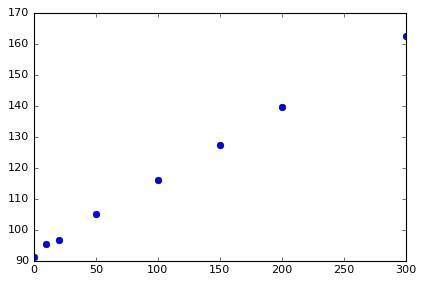

In [7]:
plt.plot(weight, length, 'o')

## コマンドラインからの実行

### Python スクリプトファイル

これまでは、Jupyter-notebook を用いてプログラム開発を行ってきた。
Jupyter-notebook は試行錯誤しながらプログラムの開発する時には便利であるが :

- 繰り返し用いるプログラム
- 常時運転させるソフトウェア
- GUI 環境のないワークステーション内での計算

などでは、Jupyter-notebook を用いた対話的な操作よりも、スクリプトファイルとして開発する方が望ましい。

本節では、繰り返し用いる関数をスクリプトファイル化し、
Jupyter-notebook から呼び出す方法について学ぶ。
例として、以前開発した２つのベクトルの内積を計算する `list_dot` 関数を
スクリプトファイルとして保存しよう。
注意点は:

- スクリプトファイル名は、`.py` で終わる必要がある
- スクリプトファイル内で用いるパッケージは全てスクリプトファイル内でimport する必要がある
  例えば、numpy の関数を用いるスクリプトファイルでは、ファイルの冒頭に `import numpy as np`
  を記述する必要がある。
- スクリプトファイル内からは、スクリプトファイル外の変数にはアクセスできない

ことなどである。



### スクリプトファイル内の関数を呼び出す



まず Jupyter-notebook の作業フォルダ内に、
`list_functions.py` というファイル名の空のファイルを作成する。
作業フォルダ内で右クリックし、新しいファイルを作成し、
作成したファイルを notebook++ などのテキストエディタで編集する。

上で挙げた注意点に気をつけながら以下をファイル中に記述し、保存する。

----------------------------------

```Python
def list_dot(x1, x2):
  """
  2つのリストを受け取り、その内積を計算する関数。
  """
  dot = 0.0
  for i in range(len(x1)):
      dot += x1[i]*x2[i] # x += y は、x に x+y を代入することを表す。
  return dot # return 文で計算した値を返す。
```

----------------------------------

ここで作成したスクリプトファイルは、別のスクリプトファイルやJupyter-notebookなどから呼び出すことができる。

呼び出すためには、 `numpy` の関数を呼び出す時のように、`import`文を用いて呼び出しを宣言する。
（なお、ファイル拡張子 `.py` の部分は省略する必要がある）

In [8]:
import list_functions

`list_functions` の中に作成した `list_dot` 関数を呼び出すためには、  
`list_functions.list_dot`  
というように、`.`に続けて関数名を指定する。

In [10]:
# [1,1,1] と [0,1,1] の内積を計算させる。
list_functions.list_dot([1,1,1], [0,1,1])

2.0

なお、関数のカッコ内にカーソルがある状態で `Shift + Tab` を押すことで、関数の中に書いた説明（docstring という）を表示させることができる。

![image](figs/listdot_help.png)

### 課題

2つの行列 A と B の積を計算する関数をスクリプトファイルとして作成せよ。
適当な2つの行列積を、そのスクリプトファイルをインポートすることで実行せよ。

なお、1つのスクリプトファイルの中には複数の関数を記述することができる。
上記関数を、`list_functions.py` の中に `list_product` という名前で作成せよ。

## スクリプトファイルの実行

これまではJupyter-notebookを用いてスクリプトを実行してきたが、Python は単体で実行することができる。
といっても、Jupyter-notebook に記述したスクリプトを1つのファイルにまとめるだけである。

上記のlist_dot関数を用いた内積の計算を行うスクリプトファイルを作成するには、

1. list_functions.py と同じフォルダ内に、適当な名前のファイル（例えば list_dot_script.py）を作成する。
2. 上で作った内容をファイル内に記述する。
具体的には以下のようなものである。

```python
import list_functions

print(list_functions.list_dot([1,1,1], [0,1,1])
```

3. このようにして作成したスクリプトファイルは、コマンドプロンプトから実行することになる。
まず、コマンドプロンプトを新たに起動し、上記スクリプトファイルがあるフォルダに移動する。

```bash
cd \d M:
cd Documents/johokiso_enshu
```

以下のようなコマンドで実行できる。

```bash
python list_dot_script.py
```

### 課題

2つの行列の積を計算するスクリプトファイルを`list_product_script.py` という名前で作成し、実行せよ。
また、実行結果をスクリーンショットに撮り、メール添付せよ。

# 他のプログラミング言語の学習


## インタープリタとコンパイラ

世の中には様々なプログラミング言語があり、性質がそれぞれ異なる。
本演習ではプログラミング言語としてPythonを学習するが、
別の授業では別の言語を用いることもある。
以下に述べるように、プログラミング言語にはインタープリタ言語とコンパイラ言語という大きく異なる２種類に分類できる。
本節では、その違いを学習する。

これまで学習してきたPythonは”インタープリタ”とよばれる種類のプログラミング言語である。
インタープリタでは、コンピュータがソースコードを１文ずつ読み込み、
それをコンピュータが実行できる形式に内部的に変更し、順番に実行していく。
その変換・実行は１行ずつ行われるので、例えばソースコードの後半にバグがあっても途中までは実行されることになる。

一方で、コンパイラと呼ばれる種類のプログラミング言語もある。
主には

- Fortran
- C
- C++

などがそれにあたる。
コンパイラ言語では、
コンピュータはまず全てのソースコードをコンピュータが実行できる形式に変換する。
そのようにして作成されたファイルを実行ファイルと呼ぶ。
ソースコードに記載した内容を実行するためには、コンパイルによって作成された実行ファイルを用いる。

コンパイラ言語の特徴は”高速な実行が可能”な点であり、シミュレーションや、
OS（オペレーティングシステム）など、高速な挙動が求められる用途に用いられる。
一方でその短所は

- 一般に文法が厳密であり、同じ作業を記述するためにもインタープリタと比較しソースコードが長くなる
- コンパイル（実行ファイルを作成する操作）に時間がかかる
- デバッグ作業・コードの修正に時間がかかる
- 実行環境に依存性がある（Windowsでコンパイルした実行ファイルはMacでは動かない）

などがある。

ただし、現在ではデバッグが容易なコンパイラ言語の開発環境が開発されていたり
高速計算が可能なインタープリタ言語が開発されていたりするので両者の境界はあいまいになりつつある。
例えば、PythonのNumpyによる行列演算などはFortranで実装されており高速に行うことができる。



## コンパイラ言語 Fortran での開発

ここではコンパイラ言語として、Fortran90 と呼ばれる言語を簡単に学ぶ。
なお、Fortranは特に高速計算に向いた言語であり、
科学シミュレーション分野でよく用いられるものである。

まず、適当なフォルダ内に HelloWorld.f90 という名前の新しいテキストファイルを作成する。

ファイル内に以下を記述し、保存する。

```fortran
program HelloWorld
    write(6,*) 'Hello World!'     ! 出力. クォーテーションマークの内側は任意の文字列.
    stop     ! プログラムを停止.
end program HelloWorld
```

### コンパイル・実行


まず、コマンド・プロンプトで上記ファイルを保存したディレクトリに移動する。
例えば

```bash
cd /d M:
cd Johokiso-enshu
```

Fortranのようなコンパイル言語では、まず作成したコードをコンピュータが理解できる
実行ファイルに変換する必要がある。
その操作をコンパイルと呼ぶ。

教育用情報端末でFortranをコンパイルするには、`gfortran` を用いる。
コマンドプロンプ卜で以下を実行する。

```bash
gfortran HelloWorld.f90 -o HelloWorld.exe
```

上記コマンドは、Fortranで書かれたソースコードHelloWorld.f90をコンパイルし、
HelloWorld.exe という実行ファイルを作成するための命令である。
この操作が成功すると、同じフォルダ内に`HelloWorld.exe`というファイルが作成される。
コマンドプロンプトで

```bash
dir
```

を実行することで、同フォルダ内のファイル一覧を表示することができるので確認すること。

実際のプログラムの実行は、このファイルを用いて行う。
コマンドプロンプト上で

```bash
HelloWorld.exe
```

と入力すれば , クォーテーションマークの内側に書いた文字列
( サンプルプログラムでは Hello World!) がその
まま画面上に表示される .


## 課題

以下のFortranソースコードをvariable.f90というファイル名で保存し、
コンパイルした後、実行せよ。
実行した時のスクリーンショットをメール添付せよ。

```fortran
program LightSpeed
    !
    ! この例題では, 光が1秒間に地球を何周するかを計算する.
    !
    implicit none     ! 暗黙の型宣言の禁止.
    double precision:: c          ! 光速
    double precision:: dia_km     ! 地球の直径 単位：km
    double precision:: dia_m      ! 地球の直径 単位：m
    double precision:: circumference ! 地球赤道面の円周.
    double precision:: pi         ! 円周率

    c = 299792458.d0      ! 単位：[m/s]
    dia_km = 12742.d0     ! 単位：[km]
    pi = acos(-1.d0)      ! 円周率. 単位:[1]

    dia_m = dia_km * 1.0d3     ! 単位を km から m に変換する.
    circumference = dia_m * pi  ! 円周(単位：m)を直径×円周率で求める.
    write(6,*) c/circumference, ' times/s'

    stop
end program LightSpeed
```